## Decision Tree Classification Model

We will use the built in Pima Indians Diabetes dataset. It is available as part of the SKlearn datasets. We have made it easily available for you.

In [ ]:
import pandas as pd

col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("https://an-utd-python.s3.us-west-1.amazonaws.com/pima-indians-diabetes.csv", header=None, names=col_names)

In [ ]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
predictions = clf.predict(X_test)
predicted_probas = clf.predict_proba(X_test)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

print(classification_report(y_test, predictions)) # predictions contain predicted values (derived from probability with 0.5 threshold)
print('Predicted labels: ', predictions)
print('Accuracy: ', accuracy_score(y_test, predictions))


              precision    recall  f1-score   support

           0       0.72      0.79      0.75       146
           1       0.57      0.46      0.51        85

    accuracy                           0.67       231
   macro avg       0.64      0.63      0.63       231
weighted avg       0.66      0.67      0.66       231

Predicted labels:  [0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0 1 0 1 1 0 0
 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1 1 1 1 0 0
 1 0 1 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 1 0 1
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0 1 1 0 1 0
 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1]
Accuracy:  0.670995670995671


In [ ]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.9/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


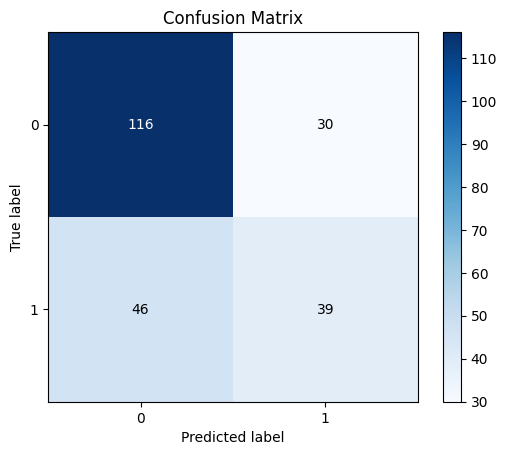

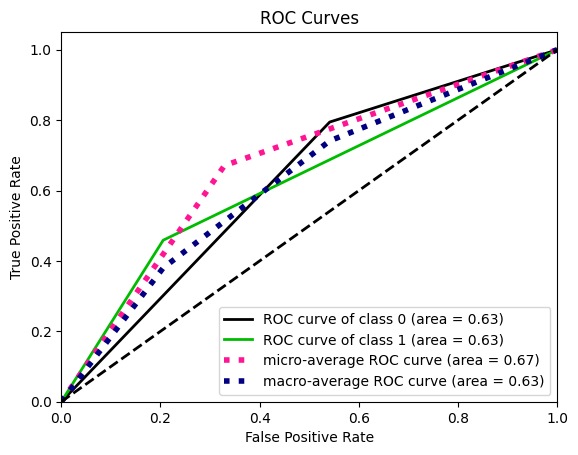

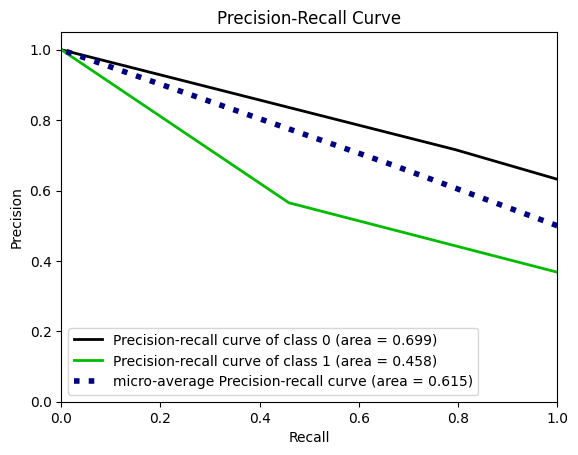

In [ ]:
import scikitplot as skplt
import matplotlib.pyplot as plt


skplt.metrics.plot_confusion_matrix(y_test, predictions)
skplt.metrics.plot_roc(y_test, predicted_probas)
skplt.metrics.plot_precision_recall_curve(y_test, predicted_probas)
plt.show()

In [ ]:
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
X.columns

Index(['pregnant', 'insulin', 'bmi', 'age', 'glucose', 'bp', 'pedigree'], dtype='object')

In [ ]:
classes = y.unique()

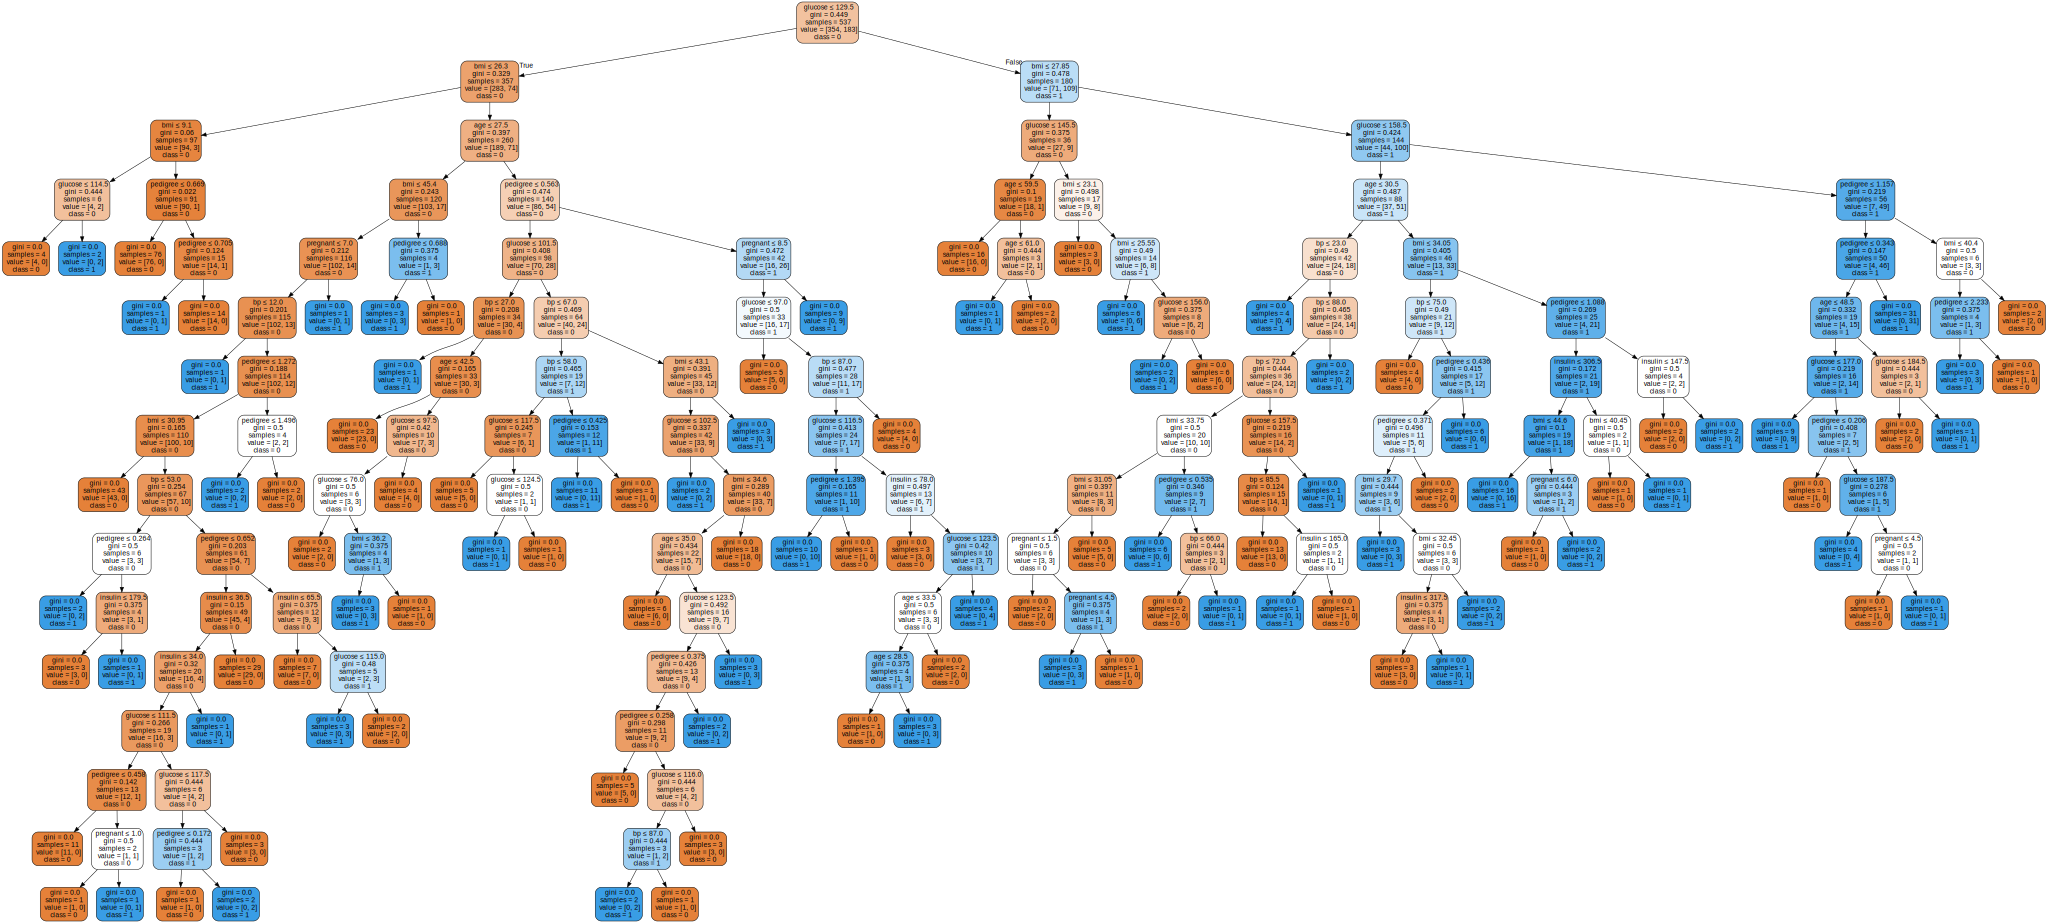

In [ ]:
import graphviz 
from sklearn import tree
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names = feature_cols,class_names=['0','1'],
                     filled=True, rounded=True,
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

# Excercise 1

Construct the following models on the same dataset:
- Bagging
- Random Forest
- Adaboost

Compare their performance and write a short paragraph on which one is the best. You are free to change the hyperparameters.


### Application on Cuisines Dataset

In [ ]:
import pandas as pd
cuisines_df = pd.read_csv("https://an-utd-python.s3.us-west-1.amazonaws.com/cuisines.csv")
cuisines_df.head()

,Unnamed: 0,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,0,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,indian,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
cuisines_label_df = cuisines_df['cuisine']
cuisines_label_df.head()

0    indian
1    indian
2    indian
3    indian
4    indian
Name: cuisine, dtype: object

In [ ]:
cuisines_label_df.value_counts()

indian      799
thai        799
chinese     799
japanese    799
korean      799
Name: cuisine, dtype: int64

In [ ]:
type(cuisines_label_df)

pandas.core.series.Series

In [ ]:
cuisine_labels_distinct = cuisines_label_df.unique()

In [ ]:
cuisine_labels_distinct

array(['indian', 'thai', 'chinese', 'japanese', 'korean'], dtype=object)

In [ ]:
cuisines_feature_df = cuisines_df.drop(['Unnamed: 0', 'cuisine'], axis=1)
cuisines_feature_df.head()

,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,artichoke,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,classification_report, precision_recall_curve
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(cuisines_feature_df, cuisines_label_df, test_size=0.3)

[Text(0.48660714285714285, 0.9166666666666666, 'x[112] <= 0.5\ngini = 0.8\nsamples = 2796\nvalue = [555, 543, 588, 557, 553]'),
 Text(0.25892857142857145, 0.75, 'x[290] <= 0.5\ngini = 0.782\nsamples = 2301\nvalue = [553, 217, 582, 554, 395]'),
 Text(0.14285714285714285, 0.5833333333333334, 'x[185] <= 0.5\ngini = 0.782\nsamples = 2134\nvalue = [550, 217, 578, 396, 393]'),
 Text(0.07142857142857142, 0.4166666666666667, 'x[334] <= 0.5\ngini = 0.775\nsamples = 1996\nvalue = [547, 209, 567, 396, 277]'),
 Text(0.03571428571428571, 0.25, 'x[68] <= 0.5\ngini = 0.778\nsamples = 1772\nvalue = [378, 208, 554, 366, 266]'),
 Text(0.017857142857142856, 0.08333333333333333, 'gini = 0.746\nsamples = 1359\nvalue = [311, 138, 529, 198, 183]'),
 Text(0.05357142857142857, 0.08333333333333333, 'gini = 0.735\nsamples = 413\nvalue = [67, 70, 25, 168, 83]'),
 Text(0.10714285714285714, 0.25, 'x[129] <= 0.5\ngini = 0.407\nsamples = 224\nvalue = [169, 1, 13, 30, 11]'),
 Text(0.08928571428571429, 0.08333333333333

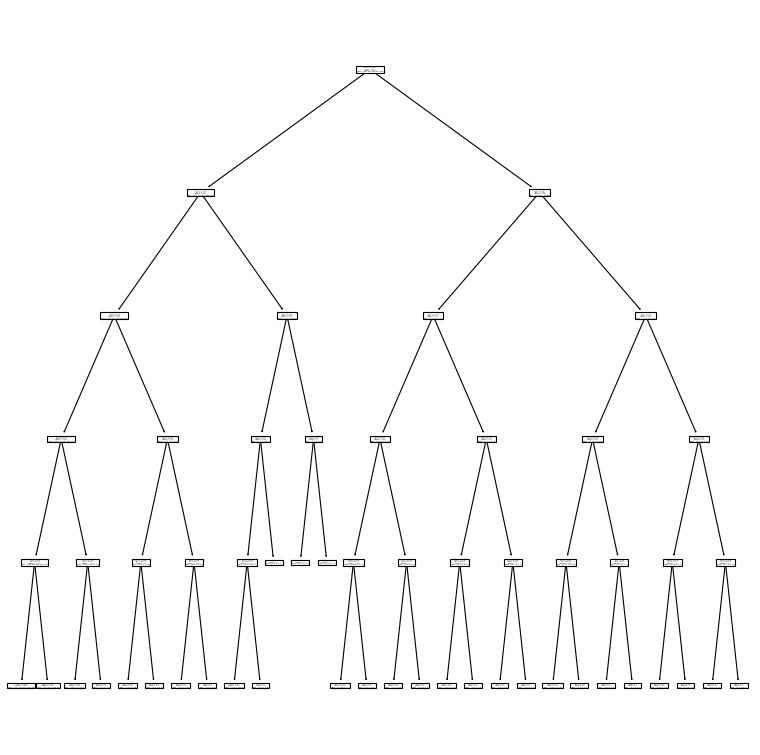

In [ ]:
from matplotlib.pyplot import figure

figure(figsize=(12, 12), dpi=80)
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth = 5)
clf = clf.fit(X_train, y_train)
tree.plot_tree(clf)

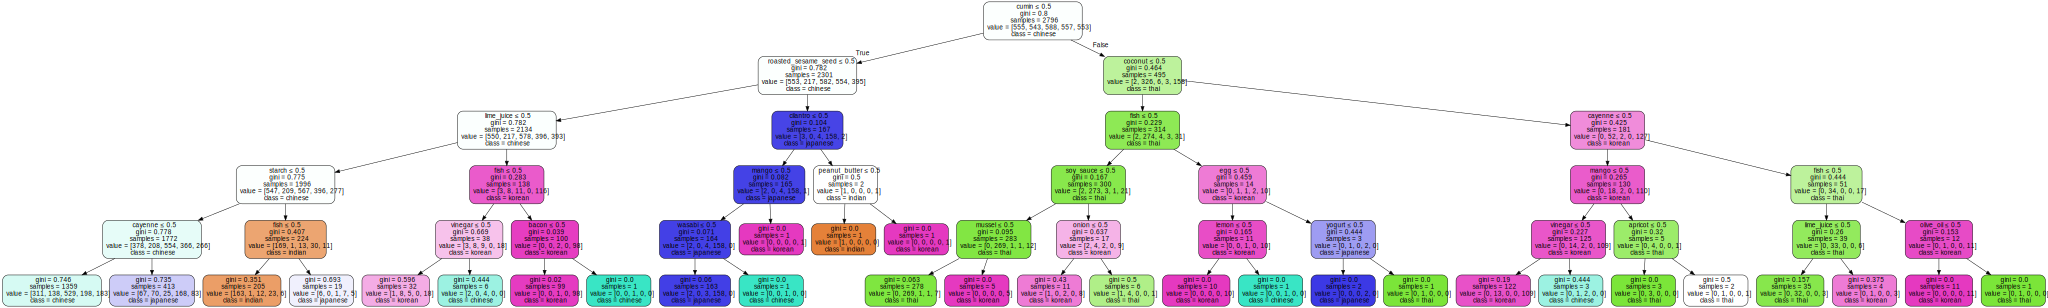

In [ ]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=cuisines_feature_df.columns,  
                     class_names=cuisine_labels_distinct,  
                     filled=True, rounded=True,
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
y_pred = clf.predict(X_test)
y_probs = clf.predict_proba(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

     chinese       0.80      0.27      0.40       244
      indian       0.92      0.52      0.66       256
    japanese       0.34      0.93      0.49       211
      korean       0.57      0.62      0.60       242
        thai       0.78      0.41      0.53       246

    accuracy                           0.54      1199
   macro avg       0.68      0.55      0.54      1199
weighted avg       0.69      0.54      0.54      1199



/usr/local/lib/python3.9/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


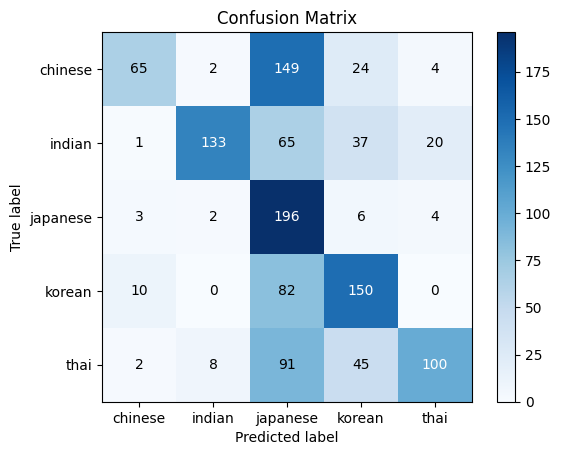

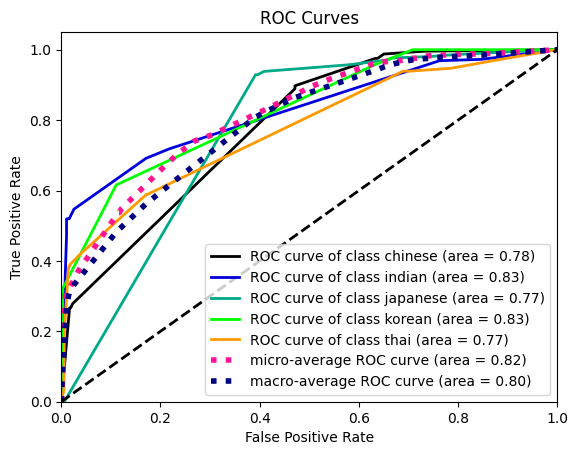

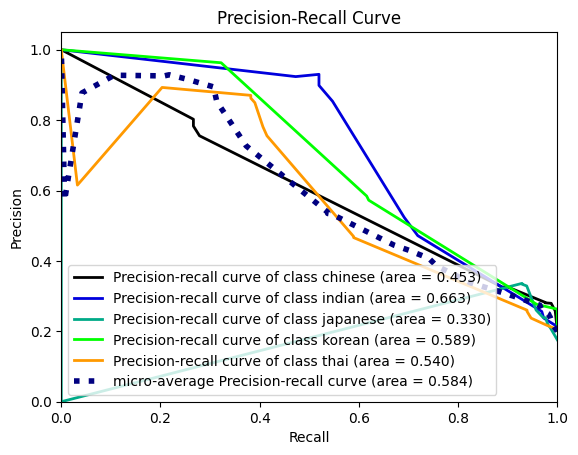

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
skplt.metrics.plot_roc(y_test, y_probs)
skplt.metrics.plot_precision_recall_curve(y_test, y_probs)
plt.show()

In [ ]:
rf = RandomForestClassifier(max_depth=3, random_state=0, n_estimators = 100)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, random_state=0)

In [ ]:
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

     chinese       0.78      0.48      0.59       244
      indian       0.88      0.77      0.82       256
    japanese       0.42      0.88      0.57       211
      korean       0.83      0.67      0.74       242
        thai       0.80      0.60      0.69       246

    accuracy                           0.68      1199
   macro avg       0.74      0.68      0.68      1199
weighted avg       0.75      0.68      0.69      1199



In [ ]:
from sklearn.ensemble import BaggingClassifier

bagging = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, random_state=0)
bagging.fit(X_train, y_train)

y_pred_bagging = bagging.predict(X_test)
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
print(classification_report(y_test, y_pred_bagging))


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


              precision    recall  f1-score   support

     chinese       0.78      0.68      0.73       244
      indian       0.90      0.83      0.86       256
    japanese       0.75      0.83      0.79       211
      korean       0.82      0.79      0.80       242
        thai       0.72      0.82      0.77       246

    accuracy                           0.79      1199
   macro avg       0.79      0.79      0.79      1199
weighted avg       0.79      0.79      0.79      1199



In [ ]:
adaboost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=100, random_state=0)
adaboost.fit(X_train, y_train)

y_pred_adaboost = adaboost.predict(X_test)
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
print(classification_report(y_test, y_pred_adaboost))


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


              precision    recall  f1-score   support

     chinese       0.66      0.52      0.58       244
      indian       0.85      0.76      0.80       256
    japanese       0.62      0.61      0.61       211
      korean       0.63      0.77      0.69       242
        thai       0.66      0.73      0.69       246

    accuracy                           0.68      1199
   macro avg       0.68      0.68      0.68      1199
weighted avg       0.69      0.68      0.68      1199



### **Paragraph**

Based on the given performance metrics for Random Forest, Bagging, and AdaBoost, the Bagging classifier appears to perform the best among the three models. The Bagging classifier has the highest overall accuracy of 0.79, compared to 0.70 for Random Forest and 0.69 for AdaBoost. 


# Exercise 2

The accuracy for this dataset is quite low. Can you try any other method that increases the accuracy. You can try either Random Forest or Adaboost. What do you notice?

# Parameter Grid Builder for Parameter Tuning

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

dt_pipe = Pipeline([('mms', MinMaxScaler()),
                     ('dt', DecisionTreeClassifier())])
params = [{'dt__max_depth': [3, 5, 7, 9],
         'dt__min_samples_leaf': [2, 3, 5]}]
         
gs_dt = GridSearchCV(dt_pipe,
                      param_grid=params,
                      scoring='accuracy',
                      cv=5)
gs_dt.fit(cuisines_feature_df, cuisines_label_df)
print(gs_dt.best_params_)
# find best model score
print(gs_dt.score(cuisines_feature_df, cuisines_label_df))


{'dt__max_depth': 9, 'dt__min_samples_leaf': 3}
0.6475594493116396


In [ ]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

rf = RandomForestClassifier()

params = {'max_depth': [5, 7, 9], 
          'n_estimators': [50, 100, 200],
          'max_features': ['sqrt', 'log2']
          }  

grid = GridSearchCV(rf, params, cv=10, scoring='accuracy', return_train_score=False)
grid.fit(cuisines_feature_df, cuisines_label_df)

print(grid.best_params_)
# find best model score
print(grid.score(cuisines_feature_df, cuisines_label_df))

{'max_depth': 9, 'max_features': 'log2', 'n_estimators': 200}
0.8017521902377972


In [ ]:
ab = AdaBoostClassifier()

params = {'n_estimators': [50, 100, 200],
          'learning_rate': [0.1, 0.5, 1]
          }

grid_ab = GridSearchCV(ab, params, cv=10, scoring='accuracy', return_train_score=False)
grid_ab.fit(cuisines_feature_df, cuisines_label_df)

print(grid_ab.best_params_)
# find best model score
print(grid_ab.score(cuisines_feature_df, cuisines_label_df))


{'learning_rate': 0.5, 'n_estimators': 200}
0.7354192740926158


### Paragraph

Based on my results random forest performs the best.

# Exercise 3

Try other combination of hyperparameters for Random Forest and AdaBoost models and check how good of an accuracy you can obtain.

# Regression Trees

In [ ]:
cars = pd.read_csv("https://an-vistra.s3.us-west-1.amazonaws.com/data/auto-mpg.csv")

In [ ]:
cars.head()

,mpg,cyl,displ,hp,weight,accel,yr,origin,name,color,size,marker
0,18.0,6,250.0,88,3139,14.5,71,US,ford mustang,red,27.370336,o
1,9.0,8,304.0,193,4732,18.5,70,US,hi 1200d,green,62.199511,o
2,36.1,4,91.0,60,1800,16.4,78,Asia,honda civic cvcc,blue,9.000000,x
3,18.5,6,250.0,98,3525,19.0,77,US,ford granada,red,34.515625,o
4,34.3,4,97.0,78,2188,15.8,80,Europe,audi 4000,blue,13.298178,s


In [ ]:
from sklearn.tree import DecisionTreeRegressor 
from sklearn import preprocessing

X = cars[['cyl', 'displ', 'hp', 'weight', 'accel', 'origin', 'size']]
y = cars['mpg']
le = preprocessing.LabelEncoder()
X['origin'] = le.fit_transform(X['origin'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0) 
  
# fit the regressor with X and Y data
regressor.fit(X_train, y_train)

<ipython-input-35-11d0c09db100>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['origin'] = le.fit_transform(X['origin'])


DecisionTreeRegressor(random_state=0)

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix, mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
import numpy as np
# finish
predictions = regressor.predict(X_test)

print("R2 square = ", r2_score(y_test, predictions))
print("MSE = ", mean_squared_error(y_test, predictions))
print("MAE = ", mean_absolute_error(y_test, predictions))
print("Explained variance score = ", explained_variance_score(y_test, predictions))

R2 square =  0.5186917184664724
MSE =  32.12443037974684
MAE =  3.981012658227849
Explained variance score =  0.5195859466101937


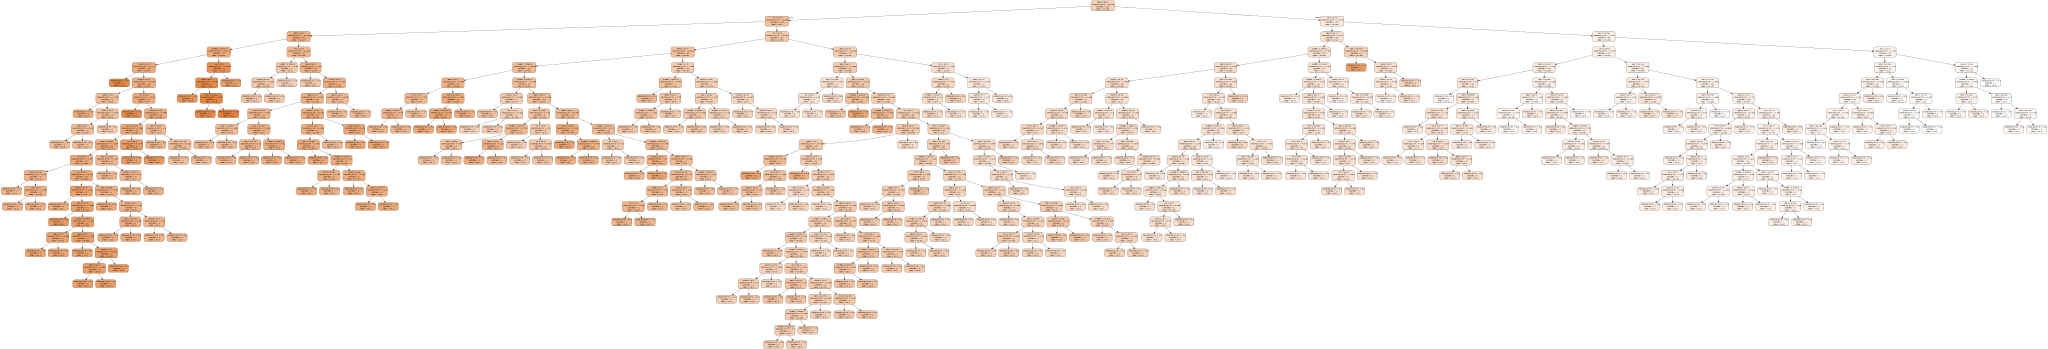

In [ ]:
import graphviz 
dot_data = tree.export_graphviz(regressor, out_file=None, 
                     feature_names=X.columns,  
                     class_names=y.unique(),  
                     filled=True, rounded=True,
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score

cars = pd.read_csv("https://an-vistra.s3.us-west-1.amazonaws.com/data/auto-mpg.csv")

X = cars[['cyl', 'displ', 'hp', 'weight', 'accel', 'origin', 'size']]
y = cars['mpg']

le = preprocessing.LabelEncoder()
X['origin'] = le.fit_transform(X['origin'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


<ipython-input-38-95d5b8cfb017>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['origin'] = le.fit_transform(X['origin'])


In [ ]:
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    print("R2 square = ", r2_score(y_test, predictions))
    print("MSE = ", mean_squared_error(y_test, predictions))
    print("MAE = ", mean_absolute_error(y_test, predictions))
    print("Explained variance score = ", explained_variance_score(y_test, predictions))


In [ ]:
rf = RandomForestRegressor(random_state=0)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
print("Best Random Forest parameters:")
print(grid_search.best_params_)
evaluate_model(best_rf, X_test, y_test)


Best Random Forest parameters:
{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
R2 square =  0.7561696034586216
MSE =  16.274211142186505
MAE =  2.8769583676019517
Explained variance score =  0.7583471143150335


In [ ]:
base_estimator = DecisionTreeRegressor(random_state=0)

adaboost = AdaBoostRegressor(base_estimator=base_estimator, random_state=0)

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
    'base_estimator__max_depth': [None, 2, 5]
}

grid_search = GridSearchCV(estimator=adaboost, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_adaboost = grid_search.best_estimator_
print("Best AdaBoost parameters:")
print(grid_search.best_params_)
evaluate_model(best_adaboost, X_test, y_test)


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble

Best AdaBoost parameters:
{'base_estimator__max_depth': 5, 'learning_rate': 0.1, 'n_estimators': 200}
R2 square =  0.7188348905480992
MSE =  18.766078478897533
MAE =  3.1596592536166805
Explained variance score =  0.7204107664753904
